In [1]:
import gzip
import csv
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
from collections import Counter
import seaborn as sns 
from matplotlib.ticker import StrMethodFormatter



In [2]:
data_complete = pd.read_csv('NYC_listings.csv', nrows=1000, error_bad_lines=False)
data_complete.fillna(0, inplace=True)

price = data_complete['price']
prices=[]

for p in price:
    p=float(p[1:].replace(',',''))
    prices.append(p)

data_complete['price']=prices

data_complete = pd.DataFrame(data_complete)
data_complete

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,2515,https://www.airbnb.com/rooms/2515,20181206022948,2018-12-06,Stay at Chez Chic budget room #1,Step into our artistic spacious apartment and ...,-PLEASE BOOK DIRECTLY. NO NEED TO SEND A REQUE...,Step into our artistic spacious apartment and ...,none,0,...,f,0.0,0.0,f,f,strict_14_with_grace_period,f,f,3,1.42
1,21456,https://www.airbnb.com/rooms/21456,20181206022948,2018-12-06,Light-filled classic Central Park,"An adorable, classic, clean, light-filled one-...","An adorable, classic, clean, light-filled one-...","An adorable, classic, clean, light-filled one-...",none,"Diverse. Great coffee shops and restaurants, n...",...,f,0.0,0.0,f,f,moderate,t,t,1,0.72
2,2539,https://www.airbnb.com/rooms/2539,20181206022948,2018-12-06,Clean & quiet apt home by the park,Renovated apt home in elevator building.,"Spacious, renovated, and clean apt home, one b...",Renovated apt home in elevator building. Spaci...,none,Close to Prospect Park and Historic Ditmas Park,...,f,0.0,0.0,f,f,moderate,f,f,8,0.25
3,2595,https://www.airbnb.com/rooms/2595,20181206022948,2018-12-06,Skylit Midtown Castle,"Find your romantic getaway to this beautiful, ...","- Spacious (500+ft²), immaculate and nicely fu...","Find your romantic getaway to this beautiful, ...",none,Centrally located in the heart of Manhattan ju...,...,f,0.0,0.0,f,f,strict_14_with_grace_period,t,t,2,0.37
4,21644,https://www.airbnb.com/rooms/21644,20181206022948,2018-12-06,"Upper Manhattan, New York",A great space in a beautiful neighborhood- min...,Nice room in a spacious pre-war apartment in u...,A great space in a beautiful neighborhood- min...,none,I love that the neighborhood is safe to walk a...,...,f,0.0,0.0,f,f,strict_14_with_grace_period,f,f,1,0.51
5,3330,https://www.airbnb.com/rooms/3330,20181206022948,2018-12-06,++ Brooklyn Penthouse Guestroom ++,"This is a spacious, clean, furnished master be...","Room Features: - clean, hardwood floors - 2 la...","This is a spacious, clean, furnished master be...",none,Location is GREAT!! Right off the L train in t...,...,f,0.0,0.0,f,f,strict_14_with_grace_period,f,f,3,0.35
6,21794,https://www.airbnb.com/rooms/21794,20181206022948,2018-12-06,COZY QUIET room 4 DOOGLERS!,"It's comfy & has a loft bed & a chaise lounge,...",This is the smaller room of the two I have ava...,"It's comfy & has a loft bed & a chaise lounge,...",none,GREAT Central Location. On 15th street between...,...,f,0.0,0.0,f,f,strict_14_with_grace_period,f,f,2,0.25
7,3647,https://www.airbnb.com/rooms/3647,20181206022948,2018-12-06,THE VILLAGE OF HARLEM....NEW YORK !,0,WELCOME TO OUR INTERNATIONAL URBAN COMMUNITY T...,WELCOME TO OUR INTERNATIONAL URBAN COMMUNITY T...,none,0,...,f,0.0,0.0,f,f,strict_14_with_grace_period,t,t,1,0.00
8,22911,https://www.airbnb.com/rooms/22911,20181206022948,2018-12-06,The Stuydio Modern and Light Filled,"Make your NY story in our welcoming, home away...",Welcome to The Stuydio! As featured in The New...,"Make your NY story in our welcoming, home away...",none,"Beautiful and historic, our neighborhood has a...",...,f,0.0,0.0,t,f,strict_14_with_grace_period,t,t,3,1.32
9,22918,https://www.airbnb.com/rooms/22918,20181206022948,2018-12-06,loft bed - near transportation-15min to times sq,very close to public transportation and quick ...,"i have a small, clean room i am renting in a b...",very close to public transportation and quick ...,none,i'm located between 2 big avenues with public ...,...,f,0.0,0.0,t,f,moderate,f,f,3,1.82


In [3]:
for col in data_complete.columns: 
    print(col)

id
listing_url
scrape_id
last_scraped
name
summary
space
description
experiences_offered
neighborhood_overview
notes
transit
access
interaction
house_rules
thumbnail_url
medium_url
picture_url
xl_picture_url
host_id
host_url
host_name
host_since
host_location
host_about
host_response_time
host_response_rate
host_acceptance_rate
host_is_superhost
host_thumbnail_url
host_picture_url
host_neighbourhood
host_listings_count
host_total_listings_count
host_verifications
host_has_profile_pic
host_identity_verified
street
neighbourhood
neighbourhood_cleansed
neighbourhood_group_cleansed
city
state
zipcode
market
smart_location
country_code
country
latitude
longitude
is_location_exact
property_type
room_type
accommodates
bathrooms
bedrooms
beds
bed_type
amenities
square_feet
price
weekly_price
monthly_price
security_deposit
cleaning_fee
guests_included
extra_people
minimum_nights
maximum_nights
calendar_updated
has_availability
availability_30
availability_60
availability_90
availability_365
cal

In [4]:
#Replace NaN 
data_complete.loc[data_complete['reviews_per_month'].isnull(),'reviews_per_month']=0
data_complete.loc[data_complete['square_feet'].isnull(),'square_feet']=0
data_complete.loc[data_complete['review_scores_rating'].isnull(),'review_scores_rating']=0
data_complete.loc[data_complete['review_scores_value'].isnull(),'review_scores_value']=0
data_complete.loc[data_complete['neighbourhood'].isnull(),'neighbourhood']='Not Specified'
data_complete.loc[data_complete['bathrooms'].isnull(),'bathrooms']='Not Specified'
data_complete.loc[data_complete['beds'].isnull(),'beds']='Not Specified'

In [5]:
#Create a df from columns need for analysis
NYC_listing_df = data_complete[['host_id','host_is_superhost',
                                'neighbourhood','city','state','property_type',
                                'room_type','accommodates','bathrooms','bedrooms','neighbourhood_cleansed',
                                'beds','bed_type','amenities','square_feet','price','host_total_listings_count',
                               'availability_30', 'availability_60','availability_90', 'availability_365',
                               'number_of_reviews', 'review_scores_rating', 'review_scores_value']]
NYC_listing_df

,host_id,host_is_superhost,neighbourhood,city,state,property_type,room_type,accommodates,bathrooms,bedrooms,...,square_feet,price,host_total_listings_count,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_value
0,2758,t,Harlem,New York,NY,Apartment,Private room,3,1,1.0,...,0.0,59.0,3,3,12,23,298,175,93.0,9.0
1,42032,f,Upper West Side,New York,NY,Apartment,Entire home/apt,2,1,1.0,...,0.0,140.0,1,8,8,13,248,76,94.0,10.0
2,2787,t,Kensington,Brooklyn,NY,Apartment,Private room,4,1,1.0,...,0.0,149.0,8,30,60,90,365,9,98.0,10.0
3,2845,f,Midtown,New York,NY,Apartment,Entire home/apt,2,1,0.0,...,0.0,225.0,5,15,45,75,350,41,95.0,9.0
4,82685,f,Hamilton Heights,New York,NY,Apartment,Private room,1,1,1.0,...,0.0,89.0,1,30,60,90,365,1,100.0,8.0
5,4177,f,Williamsburg,Brooklyn,NY,Apartment,Private room,2,1,1.0,...,0.0,70.0,4,11,12,12,216,38,98.0,10.0
6,83257,t,Meatpacking District,New York,NY,Apartment,Private room,2,1,1.0,...,220.0,111.0,2,24,54,84,359,26,99.0,10.0
7,4632,f,Harlem,New York,NY,Apartment,Private room,2,1,1.0,...,0.0,150.0,1,30,60,90,365,0,0.0,0.0
8,87773,f,0,Brooklyn,NY,Apartment,Entire home/apt,4,1,1.0,...,0.0,125.0,4,0,2,2,250,140,92.0,9.0
9,32294,f,0,New York,NY,Apartment,Private room,2,1,1.0,...,0.0,60.0,3,0,0,0,5,10,82.0,8.0


In [6]:
# df.Num_of_employees = df.Num_of_employees.replace({"10-Jan": "1-10",
#                                                    "Nov-50": "11-50"})

NYC_listing_df = NYC_listing_df.replace({"Brooklyn ": "Brooklyn",
                                        'NY': "New York",
                                        'Wadsworth Terrace, Manhattan, New York':'Wadsworth Terrace'})
NYC_listing_df

,host_id,host_is_superhost,neighbourhood,city,state,property_type,room_type,accommodates,bathrooms,bedrooms,...,square_feet,price,host_total_listings_count,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_value
0,2758,t,Harlem,New York,New York,Apartment,Private room,3,1.0,1.0,...,0.0,59.0,3,3,12,23,298,175,93.0,9.0
1,42032,f,Upper West Side,New York,New York,Apartment,Entire home/apt,2,1.0,1.0,...,0.0,140.0,1,8,8,13,248,76,94.0,10.0
2,2787,t,Kensington,Brooklyn,New York,Apartment,Private room,4,1.0,1.0,...,0.0,149.0,8,30,60,90,365,9,98.0,10.0
3,2845,f,Midtown,New York,New York,Apartment,Entire home/apt,2,1.0,0.0,...,0.0,225.0,5,15,45,75,350,41,95.0,9.0
4,82685,f,Hamilton Heights,New York,New York,Apartment,Private room,1,1.0,1.0,...,0.0,89.0,1,30,60,90,365,1,100.0,8.0
5,4177,f,Williamsburg,Brooklyn,New York,Apartment,Private room,2,1.0,1.0,...,0.0,70.0,4,11,12,12,216,38,98.0,10.0
6,83257,t,Meatpacking District,New York,New York,Apartment,Private room,2,1.0,1.0,...,220.0,111.0,2,24,54,84,359,26,99.0,10.0
7,4632,f,Harlem,New York,New York,Apartment,Private room,2,1.0,1.0,...,0.0,150.0,1,30,60,90,365,0,0.0,0.0
8,87773,f,0,Brooklyn,New York,Apartment,Entire home/apt,4,1.0,1.0,...,0.0,125.0,4,0,2,2,250,140,92.0,9.0
9,32294,f,0,New York,New York,Apartment,Private room,2,1.0,1.0,...,0.0,60.0,3,0,0,0,5,10,82.0,8.0


In [7]:
NYC_listing_df = NYC_listing_df.rename(columns={"host_id": "Host ID",
                                             "host_is_superhost": "Host Is Superhost",
                                             "neighbourhood": "Neighbourhood",
                                             "city": "City",
                                              "state": "State",
                                             "property_type": "Property Type",
                                             "room_type": "Room Type",
                                              "accommodates": "Accomodates",
                                              "bathrooms": "Bathrooms",
                                              "bedrooms": "Bedrooms",
                                             "bed_type": "Bed Type",
                                             "amenities": "Amenities",
                                             "square_feet": "Square Feet",
                                             "host_total_listings_count": "Host Total Listings Count",
                                             "availability_30": "Availability 30",
                                             "availability_60": "Availability_60",
                                             "availability_90": "Availability_90",
                                             "availability_365": "availability_365",
                                             "number_of_reviews": "Number of Reviews",
                                             "review_scores_rating": "Review Scores Rating",
                                            "review_scores_value": "Review Scores Value"})

NYC_listing_df.head()

,Host ID,Host Is Superhost,Neighbourhood,City,State,Property Type,Room Type,Accomodates,Bathrooms,Bedrooms,...,Square Feet,price,Host Total Listings Count,Availability 30,Availability_60,Availability_90,availability_365,Number of Reviews,Review Scores Rating,Review Scores Value
0,2758,t,Harlem,New York,New York,Apartment,Private room,3,1.0,1.0,...,0.0,59.0,3,3,12,23,298,175,93.0,9.0
1,42032,f,Upper West Side,New York,New York,Apartment,Entire home/apt,2,1.0,1.0,...,0.0,140.0,1,8,8,13,248,76,94.0,10.0
2,2787,t,Kensington,Brooklyn,New York,Apartment,Private room,4,1.0,1.0,...,0.0,149.0,8,30,60,90,365,9,98.0,10.0
3,2845,f,Midtown,New York,New York,Apartment,Entire home/apt,2,1.0,0.0,...,0.0,225.0,5,15,45,75,350,41,95.0,9.0
4,82685,f,Hamilton Heights,New York,New York,Apartment,Private room,1,1.0,1.0,...,0.0,89.0,1,30,60,90,365,1,100.0,8.0


In [8]:
#Breakdown by the number of listings per neighbourhood
NYC_neighbourhoods = NYC_listing_df.loc[:,'neighbourhood_cleansed'].value_counts()
NYC_neighbourhoods.head()

Williamsburg          115
Harlem                 86
Bedford-Stuyvesant     71
East Village           67
Greenpoint             51
Name: neighbourhood_cleansed, dtype: int64

In [9]:
# new_NYC_neighbourhoods = NYC_neighbourhoods.drop("Not Specified")
# new_NYC_neighbourhoods.head()

In [10]:
NYC_neighbourhoods = pd.DataFrame(NYC_neighbourhoods)
NYC_neighbourhoods.head()

,neighbourhood_cleansed
Williamsburg,115
Harlem,86
Bedford-Stuyvesant,71
East Village,67
Greenpoint,51


In [11]:
new_NYC_neighbourhoods = NYC_neighbourhoods.rename(columns={'neighbourhood_cleansed': "Number of Listings"})
new_NYC_neighbourhoods.head()

,Number of Listings
Williamsburg,115
Harlem,86
Bedford-Stuyvesant,71
East Village,67
Greenpoint,51


In [12]:
#new_NYC_neighbourhoods['Number of Listings'].sum()

In [13]:
top_NYC_neighbourhoods = new_NYC_neighbourhoods['Number of Listings'][:5]
top_NYC_neighbourhoods

Williamsburg          115
Harlem                 86
Bedford-Stuyvesant     71
East Village           67
Greenpoint             51
Name: Number of Listings, dtype: int64

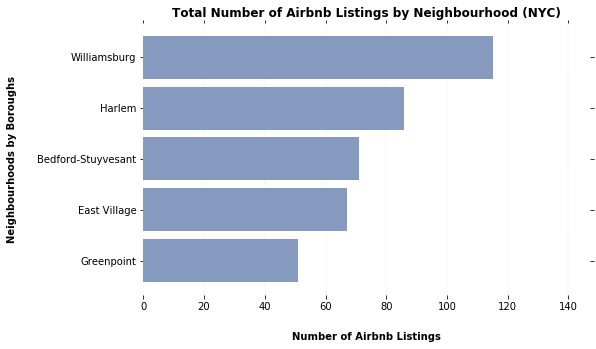

In [14]:
ax = top_NYC_neighbourhoods.plot(kind='barh', figsize=(8, 5), color= '#8699bf', zorder=2, width=0.85)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

vals1 = ax.get_xticks()

for tick in vals1:
    ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)   


ax.set_alpha(0.8)   
ax.set_title("Total Number of Airbnb Listings by Neighbourhood (NYC)",fontsize=12, fontweight='bold')    
ax.set_xlabel("Number of Airbnb Listings", labelpad=20, weight='bold', size=10)
ax.set_ylabel("Neighbourhoods by Boroughs", labelpad=20, weight='bold', size=10)
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))
ax.invert_yaxis()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

In [15]:
top_NYC_neighbourhoods_by_city = NYC_listing_df.loc[:,'City'].value_counts()
top_NYC_neighbourhoods_by_city

New York             467
Brooklyn             461
Queens                35
Staten Island         12
Bronx                 11
Long Island City       4
Jamaica                2
Briarwood              2
Astoria                1
Wadsworth Terrace      1
Elmhurst               1
Long Island            1
Rockaway Beach         1
Riverdale              1
Name: City, dtype: int64

In [16]:
top_NYC_neighbourhoods_by_city = pd.DataFrame(top_NYC_neighbourhoods_by_city)
top_NYC_neighbourhoods_by_city

,City
New York,467
Brooklyn,461
Queens,35
Staten Island,12
Bronx,11
Long Island City,4
Jamaica,2
Briarwood,2
Astoria,1
Wadsworth Terrace,1


In [17]:
top_NYC_neighbourhoods_by_city = top_NYC_neighbourhoods_by_city.rename(columns={'City': "Number of Listings"})
top_NYC_neighbourhoods_by_city.head()
#top_NYC_neighbourhoods_by_city.sum()

,Number of Listings
New York,467
Brooklyn,461
Queens,35
Staten Island,12
Bronx,11


In [18]:
top5_NYC_neighbourhoods_by_city = top_NYC_neighbourhoods_by_city['Number of Listings'][:5]
top5_NYC_neighbourhoods_by_city

New York         467
Brooklyn         461
Queens            35
Staten Island     12
Bronx             11
Name: Number of Listings, dtype: int64

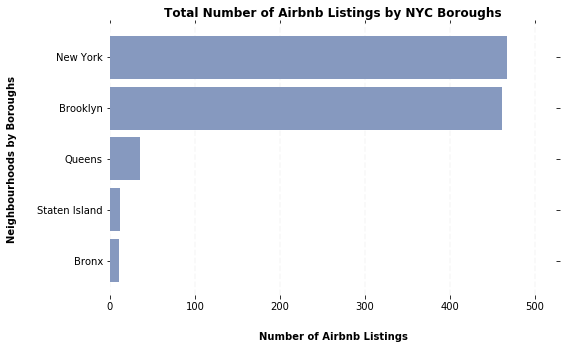

In [19]:
ax = top5_NYC_neighbourhoods_by_city.plot(kind='barh', figsize=(8, 5), color= '#8699bf', zorder=2, width=0.85)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

vals1 = ax.get_xticks()

for tick in vals1:
    ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)   


ax.set_alpha(0.8)   
ax.set_title("Total Number of Airbnb Listings by NYC Boroughs",fontsize=12, fontweight='bold')    
ax.set_xlabel("Number of Airbnb Listings", labelpad=20, weight='bold', size=10)
ax.set_ylabel("Neighbourhoods by Boroughs", labelpad=20, weight='bold', size=10)
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))
ax.invert_yaxis()


# def autolabel(rects):
#     """Attach a text label above each bar in *rects*, displaying its height."""
    
#     for rect in rects:
#         height = rect.get_height()
#         ax.annotate('{}'.format(height),
#                     xy=(rect.get_x() + rect.get_width() / 2, height),
#                     xytext=(0, 3),  # 3 points vertical offset
#                     textcoords="offset points",
#                     ha='center', va='bottom')

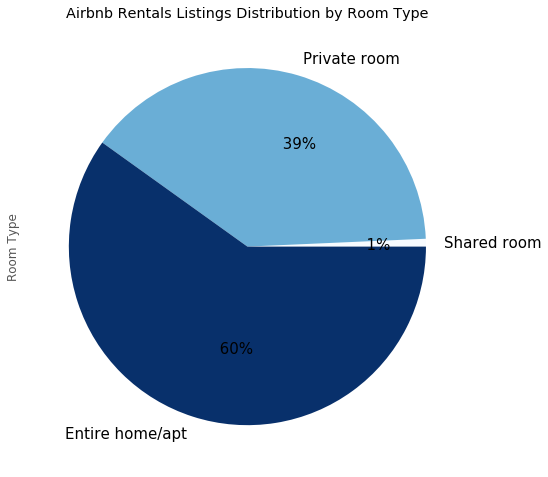

In [20]:
#room type visualizations 

matplotlib.style.use('ggplot')

room = data_complete.room_type
r = Counter(room)

room_df = pd.DataFrame.from_dict(r, orient='index').sort_values(by=0)
room_df.columns = ['Room Type']
room_df.plot.pie(y = 'Room Type', 
                 colormap = 'Blues', 
                 figsize=(8,10), 
                 fontsize = 15, autopct = '%11.f%%',
                 legend = False,
                 title = 'Airbnb Rentals Listings Distribution by Room Type')

#make title bold, and text smaller

In [21]:
NYC_listing_df.head()

,Host ID,Host Is Superhost,Neighbourhood,City,State,Property Type,Room Type,Accomodates,Bathrooms,Bedrooms,...,Square Feet,price,Host Total Listings Count,Availability 30,Availability_60,Availability_90,availability_365,Number of Reviews,Review Scores Rating,Review Scores Value
0,2758,t,Harlem,New York,New York,Apartment,Private room,3,1.0,1.0,...,0.0,59.0,3,3,12,23,298,175,93.0,9.0
1,42032,f,Upper West Side,New York,New York,Apartment,Entire home/apt,2,1.0,1.0,...,0.0,140.0,1,8,8,13,248,76,94.0,10.0
2,2787,t,Kensington,Brooklyn,New York,Apartment,Private room,4,1.0,1.0,...,0.0,149.0,8,30,60,90,365,9,98.0,10.0
3,2845,f,Midtown,New York,New York,Apartment,Entire home/apt,2,1.0,0.0,...,0.0,225.0,5,15,45,75,350,41,95.0,9.0
4,82685,f,Hamilton Heights,New York,New York,Apartment,Private room,1,1.0,1.0,...,0.0,89.0,1,30,60,90,365,1,100.0,8.0


In [80]:
NYC_neighbourhood_total = len(NYC_listing_df['City'].unique())
NYC_neighbourhood_total

14

In [81]:
NYC_neighbourhood_price = NYC_listing_df.groupby(['City']).mean()['price']
NYC_neighbourhood_price.sort_values(ascending=False)

City
New York             181.244111
Brooklyn             142.559653
Riverdale            120.000000
Astoria               99.000000
Queens                98.714286
Long Island City      84.750000
Long Island           75.000000
Briarwood             75.000000
Jamaica               72.500000
Wadsworth Terrace     71.000000
Staten Island         71.000000
Bronx                 70.181818
Rockaway Beach        70.000000
Elmhurst              59.000000
Name: price, dtype: float64

In [82]:
NYC_neighbourhoods_grouped = NYC_listing_df.groupby('City').agg({'price': ['mean', 'min','max']})
#NYC_neighbourhoods_grouped.rename(columns={'City': 'Neighbourhood'})
NYC_neighbourhoods_grouped = NYC_neighbourhoods_grouped.reset_index()
NYC_neighbourhoods_grouped.head()

City       price             
                    mean   min    max
0    Astoria   99.000000  99.0   99.0
1  Briarwood   75.000000  75.0   75.0
2      Bronx   70.181818  45.0  125.0
3   Brooklyn  142.559653  27.0  800.0
4   Elmhurst   59.000000  59.0   59.0

In [83]:

#get rid of duplicate -Brooklyn
#create a chart summarizing only 5 bouroughs - The Bronx, Brooklyn, Manhattan, Queens, and Staten Island.


level_0 index Neighbourhood        Room Type       price             
                                                      mean   min    max
0       0     0       Astoria     Private room   99.000000  99.0   99.0
1       1     1     Briarwood     Private room   75.000000  75.0   75.0
2       2     2         Bronx  Entire home/apt   97.250000  77.0  125.0
3       3     3         Bronx     Private room   54.714286  45.0   90.0
4       4     4      Brooklyn  Entire home/apt  179.618705  50.0  800.0

In [85]:
NYC_neighbourhoods_grouped2= NYC_listing_df.groupby(['City','Room Type']).agg({'price': ['mean', 'min','max']})
NYC_neighbourhoods_grouped2 = NYC_neighbourhoods_grouped2.reset_index()
NYC_neighbourhoods_grouped2.head()

City        Room Type       price             
                                     mean   min    max
0    Astoria     Private room   99.000000  99.0   99.0
1  Briarwood     Private room   75.000000  75.0   75.0
2      Bronx  Entire home/apt   97.250000  77.0  125.0
3      Bronx     Private room   54.714286  45.0   90.0
4   Brooklyn  Entire home/apt  179.618705  50.0  800.0

In [86]:
# NYC_sorted_by_mean_df=NYC_neighbourhoods_grouped2.sort_values(('price','mean'),ascending=False)
# NYC_sorted_by_mean_df
NYC_neighbourhoods_grouped2=NYC_neighbourhoods_grouped2.rename(columns={'City': 'Neighbourhood'})


NYC_neighbourhoods_grouped2.head()

Neighbourhood        Room Type       price             
                                        mean   min    max
0       Astoria     Private room   99.000000  99.0   99.0
1     Briarwood     Private room   75.000000  75.0   75.0
2         Bronx  Entire home/apt   97.250000  77.0  125.0
3         Bronx     Private room   54.714286  45.0   90.0
4      Brooklyn  Entire home/apt  179.618705  50.0  800.0

In [88]:
NYC_neighbourhoods_grouped2=pd.DataFrame(NYC_neighbourhoods_grouped2)
NYC_neighbourhoods_grouped2 = NYC_neighbourhoods_grouped2.rename(columns={'City': 'Neighbourhood'})

NYC_neighbourhoods_grouped2.head()

Neighbourhood        Room Type       price             
                                        mean   min    max
0       Astoria     Private room   99.000000  99.0   99.0
1     Briarwood     Private room   75.000000  75.0   75.0
2         Bronx  Entire home/apt   97.250000  77.0  125.0
3         Bronx     Private room   54.714286  45.0   90.0
4      Brooklyn  Entire home/apt  179.618705  50.0  800.0

In [48]:
# NYC_five_boroughs=NYC_neighbourhoods_grouped2.drop(["Long Island City","Astoria","Long Island",
#                                                     "Briarwood","Jamaica","Wadsworth Terrace",
#                                                      "Rockaway Beach","Elmhurst"])

In [89]:
NYC_private_room = NYC_neighbourhoods_grouped2.loc[NYC_neighbourhoods_grouped2["Room Type"]=="Private room"]
NYC_private_room.head()

Neighbourhood     Room Type      price             
                                    mean   min    max
0       Astoria  Private room  99.000000  99.0   99.0
1     Briarwood  Private room  75.000000  75.0   75.0
3         Bronx  Private room  54.714286  45.0   90.0
5      Brooklyn  Private room  86.262295  27.0  350.0
6      Elmhurst  Private room  59.000000  59.0   59.0

In [90]:
NYC_neighbourhoods_grouped2 = NYC_neighbourhoods_grouped2.rename(columns={'neighbourhood_cleansed': 'Neighborhood'})
#NYC_neighbourhoods_grouped2 = NYC_neighbourhoods_grouped2.reset_index()
NYC_neighbourhoods_grouped2.head()

Neighbourhood        Room Type       price             
                                        mean   min    max
0       Astoria     Private room   99.000000  99.0   99.0
1     Briarwood     Private room   75.000000  75.0   75.0
2         Bronx  Entire home/apt   97.250000  77.0  125.0
3         Bronx     Private room   54.714286  45.0   90.0
4      Brooklyn  Entire home/apt  179.618705  50.0  800.0

In [91]:
NYC_private_room = NYC_neighbourhoods_grouped2.loc[NYC_neighbourhoods_grouped2["Room Type"]=="Private room"]
#NYC_neighbourhoods_grouped2 = NYC_neighbourhood_grouped2.reset_index()
NYC_private_room.sort_values(('price','mean'),ascending=False)

Neighbourhood     Room Type       price             
                                           mean   min    max
12           New York  Private room  103.006098  50.0  300.0
0             Astoria  Private room   99.000000  99.0   99.0
5            Brooklyn  Private room   86.262295  27.0  350.0
15             Queens  Private room   78.315789  30.0  199.0
1           Briarwood  Private room   75.000000  75.0   75.0
8        Long Island   Private room   75.000000  75.0   75.0
10   Long Island City  Private room   74.666667  50.0   95.0
7             Jamaica  Private room   72.500000  70.0   75.0
21  Wadsworth Terrace  Private room   71.000000  71.0   71.0
18     Rockaway Beach  Private room   70.000000  70.0   70.0
6            Elmhurst  Private room   59.000000  59.0   59.0
3               Bronx  Private room   54.714286  45.0   90.0
20      Staten Island  Private room   44.666667  20.0   80.0

In [92]:
NYC_entire_house = NYC_neighbourhoods_grouped2.loc[NYC_neighbourhoods_grouped2["Room Type"]=="Entire home/apt"]
NYC_entire_house.head()

Neighbourhood        Room Type       price               
                                             mean    min     max
2              Bronx  Entire home/apt   97.250000   77.0   125.0
4           Brooklyn  Entire home/apt  179.618705   50.0   800.0
9   Long Island City  Entire home/apt  115.000000  115.0   115.0
11          New York  Entire home/apt  226.835017   48.0  2000.0
14            Queens  Entire home/apt  127.466667   68.0   280.0

In [93]:
NYC_shared_room = NYC_neighbourhoods_grouped2.loc[NYC_neighbourhoods_grouped2["Room Type"]=="Shared room"]
NYC_shared_room.head()

Neighbourhood    Room Type price             
                               mean   min    max
13      New York  Shared room  63.0  39.0  105.0
16        Queens  Shared room  55.0  55.0   55.0

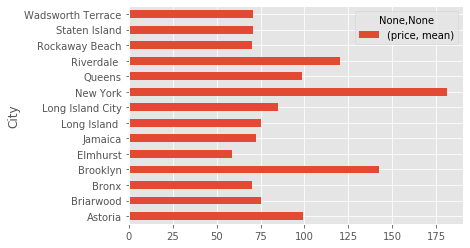

In [94]:
NYC_neighbourhoods_grouped2= NYC_listing_df.groupby(['City']).agg({'price': ['mean']}).plot(kind='barH')